In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import title
from random import randrange
sns.set(rc={'figure.figsize':(15,8)})

In [2]:
raw_abs = pd.read_csv("~/data/abalone.data", header = None, names = ["sex", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "rings"])

# Data processing and linear regression
## Data processing (10 Marks):
### Clean the data (eg. convert M, F and I to 0, 1 and 2). You can do this with code or simple find and replace (2 Marks). 

In [3]:
ordinal_encoder = OrdinalEncoder(categories=[['M', 'F', 'I']])
raw_abs[['sex']] = ordinal_encoder.fit_transform(raw_abs[['sex']])
raw_abs[:10]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,2.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,1.0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,1.0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,0.0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,1.0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


### Develop a correlation map using a heatmap and discuss major observations (2 Marks).

In [4]:
raw_abs.corr()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822
length,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,-0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

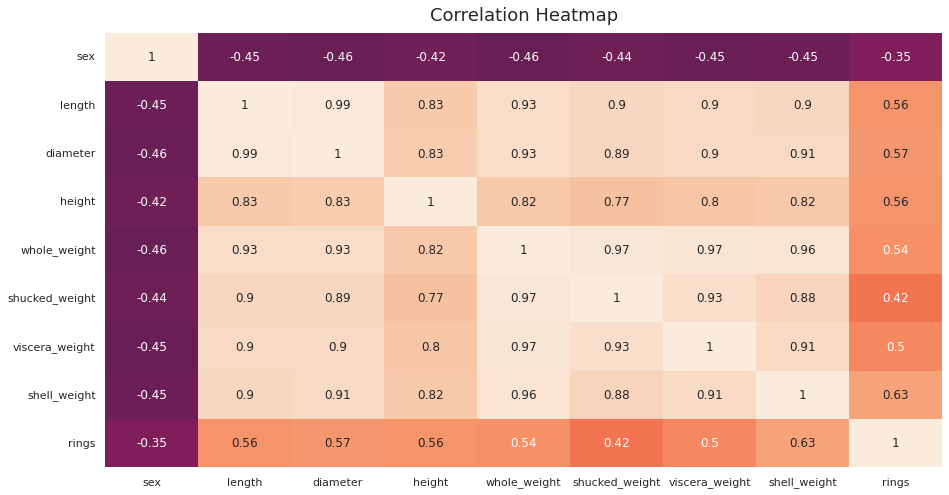

In [5]:
heatmap = sns.heatmap(raw_abs.corr(), annot=True, cbar=False, vmin=-1., vmax=1., cmap=sns.cm.rocket)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

The variables _diameter_ and _height_ were found to exhibit the highest correlation with the target variable _rings_ returning r values of 0.574660 and 0.557467 respectively. This is prehaps unsurprising given that these variables relate to the size of the abalone shell which could be expected to increase with age, and the target variable is a measure of age.

### Pick two of the most correlated features (negative or positive) and create a scatter plot with ring-age. Discuss major observations (2 Marks). 

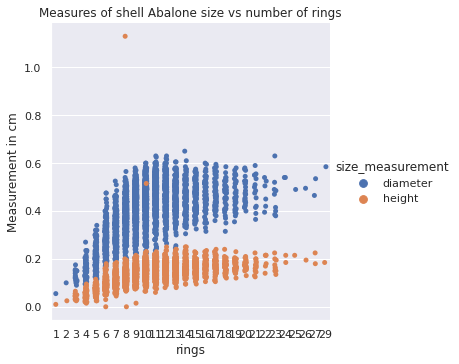

In [6]:
corel_plot_data = raw_abs[['rings', 'diameter', 'height']].copy()
melted_corel_plot_data = corel_plot_data.melt('rings', var_name='size_measurement', value_name='Measurement in cm')
corel_plot = sns.catplot(x = 'rings', hue = 'size_measurement', y = 'Measurement in cm', data = melted_corel_plot_data).set(title = "Measures of shell Abalone size vs number of rings")

corel_plot

Relative to the number of _rings_ found in each abalone shell, the growth in both _diameter_ and _height_ seem to follow an exponential decay process. Also, there seems to be two outliers amongst the obserations for the variable _height_.

The four outliers form the _height_ variable which were so abnomal relative to the rest of the data that they appeared to have been the result of errors during the data entry process. These outliers are removed from the dataset with the following code:

In [7]:
raw_abs = raw_abs[(raw_abs['height']<0.4) & (raw_abs['height']>0.01)]
corel_plot_data = raw_abs[['diameter', 'height', 'rings']].copy()

### Create histograms of the two most correlated features, and the ring-age. What are the major observations?  (2 Marks)

array([[<AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'rings'}>, <AxesSubplot:>]],
      dtype=object)

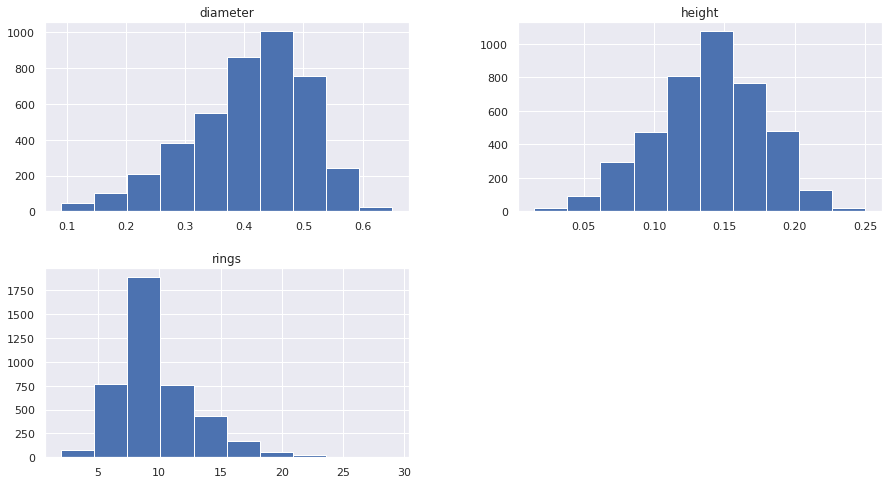

In [8]:
corel_plot_data.hist()

After removing the two _height_ outliers that variable looks to have a normal distrubtion while the _rings_ variable looks to be positively skewed and the _diameter_ varible looks to be negatively skewed.

### Create a 60/40 train/test split - which takes a random seed based on the experiment number to create a new dataset for every experiment (2 Marks).`

In [9]:
def train_test_seed(dataset, set_seed=61):
    train_set, test_set = train_test_split(dataset, test_size=0.4, random_state=set_seed)
    train_x = train_set.iloc[:, :-1]
    train_y = train_set.iloc[:, -1]
    test_x = test_set.iloc[:, :-1]
    test_y = test_set.iloc[:, -1]
    return train_x, train_y, test_x, test_y

## Modelling (10 Marks):
### Develop a linear regression model using all features for ring-age using 60 percent of data picked randomly for training and remaining for testing. Visualise your model prediction using appropriate plots. Report the RMSE and R-squared score. (4 Marks)


In [10]:
def scipy_linear_mod(TEST_NAME, x_train, x_test, y_train, y_test):
    #Source: https://edstem.org/au/courses/8954/lessons/23533/slides/166029
    global y_pred
    
    regr = linear_model.LinearRegression()

    # Create linear regression object

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)

    return pd.DataFrame([[TEST_NAME, mean_squared_error(y_test, y_pred, squared=False), r2_score(y_test, y_pred)]], columns = ["Test", "RMSE", "r_sqrd"])

In [11]:
def LM_mod(TEST_NAME = "non-normalised", dataset = raw_abs, seed=61):
    global train_x, train_y, test_x, test_y
    train_x, train_y, test_x, test_y = train_test_seed(dataset, set_seed=seed)
    return scipy_linear_mod(TEST_NAME, train_x, test_x, train_y, test_y)

In [12]:
LM_mod()

,Test,RMSE,r_sqrd
0,non-normalised,2.229428,0.551175


In [13]:
results = pd.DataFrame()
for _ in range(30):
    new_seed = randrange(50)
    results = results.append(LM_mod("non-normalised", dataset=raw_abs, seed = new_seed))


<AxesSubplot:xlabel='rings', ylabel='Predicted'>

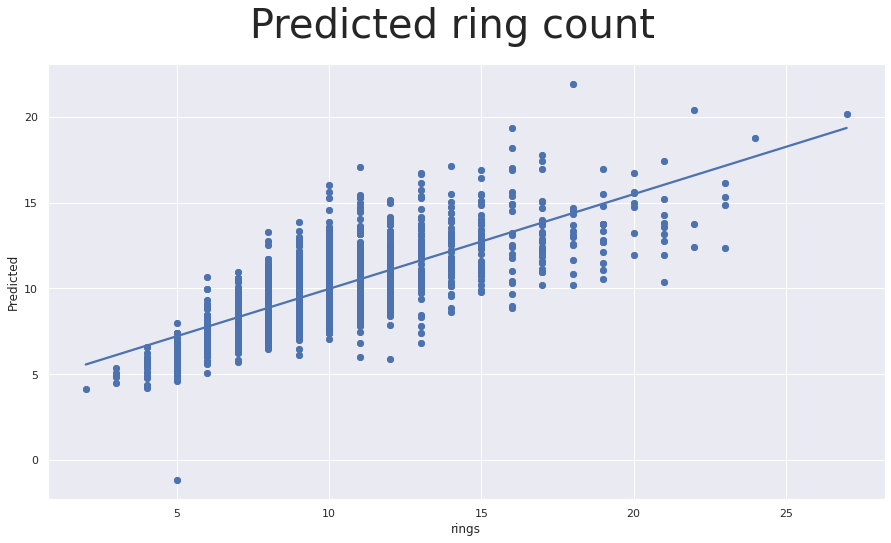

In [14]:
# Visualisation of the regression result
plt.scatter(test_y, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle('Predicted ring count', fontsize=40)
sns.regplot(x=test_y,y=y_pred,ci=None)


### Develop a linear regression model with all input features, i) without normalising input data, ii) with normalising input data. (2 Marks)

In [15]:
raw_abs = pd.read_csv("~/data/abalone.data", header = None, names = ["sex", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "rings"])

In [16]:
# Adapted from Page 70, Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow

def normalisation_pipeline(dataset):
    data_outlier_adj = dataset[(dataset['height']<0.4) & (dataset['height']>0.01)]

    num_attribs = list(data_outlier_adj.drop(["sex", "rings"], axis=1))
    cat_attribs = ["sex"]

    ordinal_encoder = OrdinalEncoder(categories=[['M', 'F', 'I']])

    num_pipeline = Pipeline([('Normalisation', MinMaxScaler())])
    cat_pipeline = Pipeline([('Cat_definition', ordinal_encoder)])

    full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)],
    remainder='passthrough')

    data_prepared = full_pipeline.fit_transform(data_outlier_adj)
    data_prepared_pd = pd.DataFrame(data_prepared)
    return data_prepared_pd

In [17]:
data_prepared_pd = normalisation_pipeline(raw_abs)


In [18]:
LM_mod(TEST_NAME="normalised", dataset=data_prepared_pd)

,Test,RMSE,r_sqrd
0,normalised,2.229428,0.551175


In [19]:
for _ in range(30):
    new_seed = randrange(50)
    results = results.append(LM_mod(TEST_NAME="normalised", dataset=data_prepared_pd, seed = new_seed)) 


### Develop a linear regression model with two selected input features from the data processing step. (2 Marks)

In [20]:
LM_mod(TEST_NAME="normalised", dataset=corel_plot_data)

,Test,RMSE,r_sqrd
0,normalised,2.640934,0.370196


In [21]:
for _ in range(30):
    new_seed = randrange(50)
    results = results.append(LM_mod(TEST_NAME="2_x_var_test", dataset=corel_plot_data, seed = new_seed)) 


### In each of the above investigations, run 30 experiments each and report the mean and std of the RMSE and R-squared score of the train and test datasets. Write a paragraph to compare your results of the different approaches taken. Note that if your code can't work for 30 experiments, only 1 experiment run is fine. You won't be penalised if you just do 1 experiment run. (2 Marks)

After repeating the experiments 30 times each I observed the following mean and standard devation values across the results:

In [22]:
results.groupby("Test").mean()

,RMSE,r_sqrd
Test,,
2_x_var_test,2.551317,0.373659
non-normalised,2.199880,0.535939
normalised,2.194276,0.542177


In [23]:
results.groupby("Test").std()

,RMSE,r_sqrd
Test,,
2_x_var_test,0.053228,0.009954
non-normalised,0.049578,0.009945
normalised,0.050485,0.010900


The experiments which were conducted with the normalised data exhibited the lowest average RMSE metric which would indicate lower error rates. These models would therefore be preferred for the purpose of forecasting the number of rings found in abalone shells. The average coefficient of determination (R^2) was observed to be significantly lower in the experiments containing only 2 independent variables and marginally lower in the case of non-normalised data. Interestingly, the variance of the models with only 2 independent variables was observed to be much higher, an undesirable trait in any model. 